In [26]:
# import os and csv functions
import os
import csv
# import libaries
import pandas as pd
import numpy as np
from tabulate import tabulate
from datetime import datetime
from sklearn.impute import SimpleImputer
from tabula import read_pdf
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# utilized for creating models and visualization
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# utilized for metrics on my models
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Homemade module
# wrangle.py
# explore.py
import modeling

# Wrangle

In [2]:
# getting the file from local
df=pd.read_csv('finalcsv.csv')
df=df.drop(columns=['Unnamed: 0'])

In [3]:
# handle the null values
df=df.fillna(0)
df.replace('D.C.','DC',inplace=True)
df['pop_density'] = df.population / df.area
df['cost']=(df.drought_loss + df.hurricane_loss + df.storm_loss)
df['support_value'] = (df.state_funding + df.funding) - (df.drought_loss + df.hurricane_loss + df.storm_loss)
df['support_level'] = pd.cut(df.support_value, 4, labels = ['bottom tier', 'below average', 'above average', 'top tier'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   full_state          3142 non-null   object  
 1   state               3142 non-null   object  
 2   county              3142 non-null   object  
 3   population          3142 non-null   int64   
 4   revenue_per_person  3142 non-null   int64   
 5   state_funding       3142 non-null   int64   
 6   funding             3142 non-null   int64   
 7   buildvalue          3142 non-null   float64 
 8   agrivalue           3142 non-null   float64 
 9   area                3142 non-null   float64 
 10  risk_score          3142 non-null   float64 
 11  resl_score          3142 non-null   float64 
 12  resl_value          3142 non-null   float64 
 13  drought_freq        3142 non-null   float64 
 14  drought_score       3142 non-null   float64 
 15  drought_loss        3142 non-null   fl

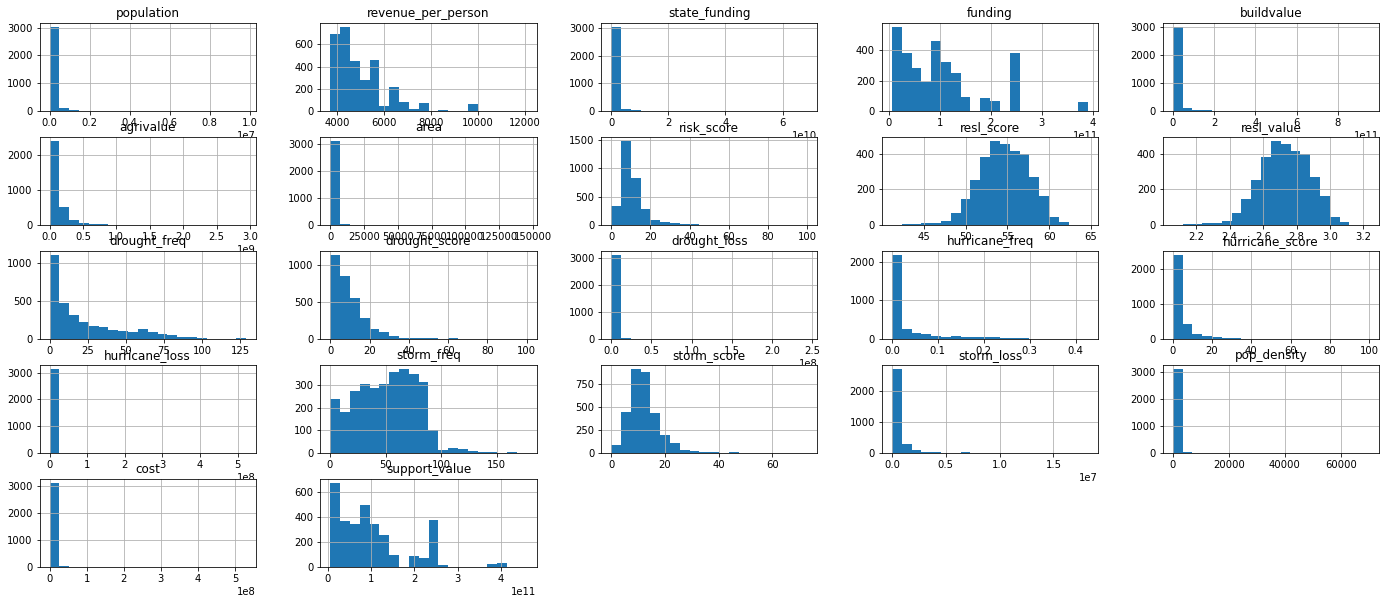

In [4]:
# identify if we have outliers outlier
df.hist(figsize=(24, 10), bins=20)
plt.show()

In [21]:
# remove outlier
# from scipy import stats
# def remove_outliers(df):
#     newdf = df.select_dtypes(include=np.number)
#     newdf = newdf[(np.abs(stats.zscore(newdf)) <5).all(axis=1)]
#     df = df[df.index.isin(newdf.index)]
#     return df
# df=remove_outliers(df)
df

,full_state,state,county,population,revenue_per_person,state_funding,funding,buildvalue,agrivalue,area,...,hurricane_freq,hurricane_score,hurricane_loss,storm_freq,storm_score,storm_loss,pop_density,cost,support_value,support_level
0,Alabama,AL,Autauga,54571,3756,204968676,54697779694,5.075584e+09,21460000.0,594.448312,...,0.056426,2.946097,3272.974160,65.740741,7.631697,2.012527e+05,91.801085,2.063511e+05,5.490254e+10,bottom tier
1,Alabama,AL,Baldwin,182265,3756,684587340,54697779694,2.314295e+10,120383000.0,1589.815853,...,0.208845,12.704112,9185.266739,108.666667,23.224606,1.912266e+06,114.645353,1.926093e+06,5.538044e+10,bottom tier
2,Alabama,AL,Barbour,27457,3756,103128492,54697779694,2.206426e+09,105565000.0,885.001636,...,0.073180,7.311136,615.508974,62.481481,12.471689,1.771194e+05,31.024801,1.792906e+05,5.480073e+10,bottom tier
3,Alabama,AL,Bibb,22915,3756,86068740,54697779694,1.643641e+09,4199000.0,622.460425,...,0.043792,1.884830,2594.946558,70.777778,5.382791,4.353395e+05,36.813585,4.553936e+05,5.478339e+10,bottom tier
4,Alabama,AL,Blount,57322,3756,215301432,54697779694,4.794278e+09,242855000.0,644.821022,...,0.012192,5.013860,17810.245704,77.074074,13.540158,3.887720e+05,88.895985,4.300227e+05,5.491265e+10,bottom tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Wyoming,WY,Sweetwater,43806,5353,234493518,6448803714,4.583896e+09,16454000.0,10426.919825,...,0.000000,0.000000,0.000000,10.962963,3.481503,6.589745e+04,4.201241,1.331563e+05,6.683164e+09,bottom tier
3138,Wyoming,WY,Teton,21294,5353,113986782,6448803714,3.476594e+09,17582000.0,3996.855337,...,0.000000,0.000000,0.000000,9.481481,6.210718,2.104278e+05,5.327688,2.433141e+05,6.562547e+09,bottom tier
3139,Wyoming,WY,Uinta,21118,5353,113044654,6448803714,2.018844e+09,26662000.0,2081.651840,...,0.000000,0.000000,0.000000,12.962963,5.590674,8.755011e+04,10.144828,2.633768e+05,6.561585e+09,bottom tier
3140,Wyoming,WY,Washakie,8533,5353,45677149,6448803714,8.867450e+08,43019000.0,2238.665800,...,0.000000,0.000000,0.000000,9.222222,7.378384,3.851772e+04,3.811645,2.622995e+05,6.494219e+09,bottom tier


In [22]:
# split df into test (20%) and train_validate (80%)
tv_df, test = train_test_split(df, test_size=0.2, random_state=123)
# split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
train, validate = train_test_split(tv_df, test_size=0.3, random_state=123)

# Wrangle Key Takeaway
- The data has 3142 rows, and 26 columns. This project specifically focusing on the Severe Storm, Draught and Hurricane.
- The project has included all 50 states' counties and the District of Columbia area. The risk score is combined with 16 different disasters and retrived it from Federal Emergency Management Agency. (FEMA)
- we removed outliers and concluded with 2123 rows and 26 columns
- Next, we will explore the data and set our target variable==support level

# Exploration

In [23]:
# lets make a map before out exploration
fig = px.choropleth(df,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='support_value',
                    color_continuous_scale="rdylbu", 
                    
                    )
fig.show()

### Takeaway
- The science.org research believes that the california will face the mega-flood in near future as climate change worsen
    - 'Recent evidence suggests that increases in western United States flood risk caused by anthropogenic warming may have been counteracted in recent decades by natural variability, but that further warming and shifts in natural variability will eventually “unmask” this accumulated increase in regional flood risk (51). Additional work suggests that the response of flood risk to climate change is likely to exhibit threshold behavior, at least in certain climatological and hydrological regimes (52), with a precipitation extremeness threshold dictating whether flood risk decreases (for smaller events, due to the antecedent soil aridification effect of warming temperatures) or increases (for the largest events, due to the overwhelming effect of large increases in precipitation intensity). Both of these considerations are especially germane to California' [science.org](https://www.science.org/doi/10.1126/sciadv.abq0995)
- The columbia study and New York Times journalist argued that the New York is not adequately prepared for the next storm like Hurricane Sandy.
    - 'The barrier debate comes as New York City is still struggling to respond to Sandy, and the larger need to carefully reshape an entire region’s infrastructure to adapt to climate change. In the more than seven years since the storm killed 72 people and caused 62 billion in damage, agencies have spent just 54 percent of the 14.7 billion allocated by the federal government to help the city recover and prepare for new storms.' [columbia.edu](https://news.climate.columbia.edu/2020/01/21/politics-cost-adapting-climate-change-new-york-city/)

### Q1: Whether the dense of the population contributed to the overall funding available or the risk level

In [8]:
# set up th eenvironment
q1=tv_df.groupby('state',as_index=False).agg(sum)
q1.head()

,state,population,revenue_per_person,state_funding,funding,buildvalue,agrivalue,area,risk_score,resl_score,...,drought_loss,hurricane_freq,hurricane_score,hurricane_loss,storm_freq,storm_score,storm_loss,pop_density,cost,support_value
0,AK,667706,104029,3020034238,313205776212,8.543237e+10,7.045900e+07,396555.713086,141.652832,1093.590800,...,6.210712e+06,0.000000,0.000000,7.044693e+07,575.000000,504.850000,1.504241e+07,221.428238,9.170005e+07,3.161341e+11
1,AL,4590704,232872,17242684224,3391262341028,4.855350e+11,5.495497e+09,47201.832935,687.128140,3284.065796,...,8.964063e+06,3.463322,481.725924,1.017216e+07,4579.777778,901.568797,2.978717e+07,5754.173487,4.892339e+07,3.408456e+12
2,AR,2447582,273168,10612715552,1850835335454,2.454010e+11,7.595697e+09,44050.424616,825.370732,3311.138624,...,7.818080e+07,0.820287,196.573418,4.432640e+07,4658.592593,960.386742,3.797352e+07,3441.775056,1.604807e+08,1.861288e+12
3,AZ,2318857,45496,9590792552,1067003742321,2.097300e+11,1.279042e+09,88001.668434,280.609547,544.061000,...,1.893374e+06,0.080974,21.743718,2.555377e+08,315.925926,249.454012,7.860945e+06,307.788916,2.652920e+08,1.076329e+12
4,CA,19686578,301043,137825732578,16804912003279,2.075350e+12,2.047743e+10,120731.915636,1151.969166,2271.785402,...,9.150243e+05,0.010000,2.100775,3.169484e+06,76.518519,342.150728,5.728423e+07,32034.798412,6.136874e+07,1.694268e+13


In [9]:
# bin the risk level to identify whether the funding available also associate with 
q1['risk_bin'] = pd.qcut(q1.risk_score, 4, labels=['low', 'median', 'hight', 'extremely_high'])

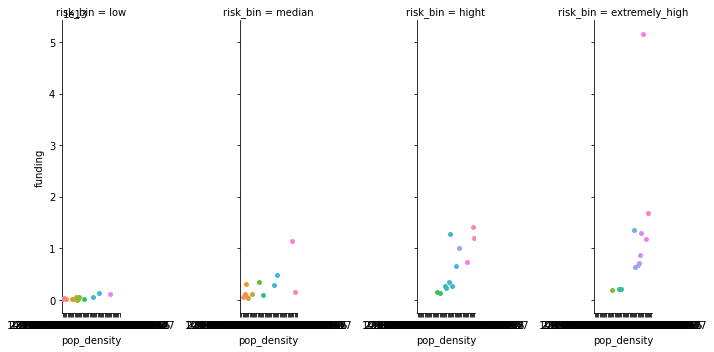

In [10]:
# use catplot
rc=sns.catplot(
    data=q1, kind="swarm",
    x="pop_density", y="funding", col="risk_bin",
    aspect=.5
)
plt.show()

### q1 Key Takeaway
- As the risk level rise, the funding will be impacted by the pop_density
- The extremely high risk has highest funding when the pop_density is high
- It is worth to further explore which region it is belong to and what kind of the disaster contributed to increased funding

### q2 the cost of the disaster per region per risk level per pop_density

In [11]:
# set up the environment
q2 = tv_df.copy()
q2['risk_bin'] = pd.qcut(q2.risk_score, 4, labels=['low', 'median', 'hight', 'extremely_high'])

# create the region based on the state's location
west = ['WA','OR','CA','ID','NV','MT','WY','UT','AZ','CO','NM']
midwest = ['ND','MN','WI','MI','SD','NE','KS','IA','MO','IL','IN','OH']
south = ['TX','OK','AR','LA','MS','TN','KY','AL','GA','FL','SC','NC','VA','WV','MD','DE','DC']
northeast = ['PA','NJ','NY','CT','MA','RI','VT','NH','ME']
west_dict = {i:"west" for i in west}
midwest_dict = {i:"midwest" for i in midwest}
south_dict = {i:"south" for i in south}
northeast_dict = {i:"northeast" for i in northeast}
d = {**west_dict, **midwest_dict, **south_dict, **northeast_dict}
q2['Region'] = q2['state'].map(d)

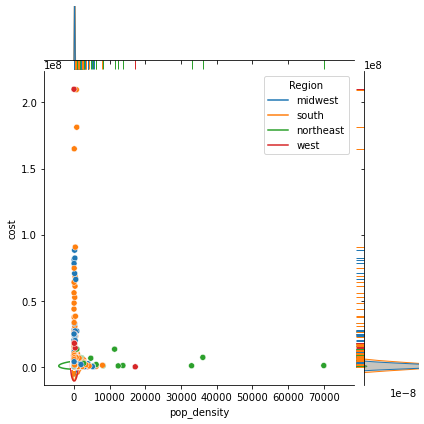

In [12]:
g = sns.jointplot(data=q2, x="pop_density", y="cost", hue='Region')
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
plt.show()

### q2 Key Takeaway
- The South region has most diversed cost versus pop_density
- The South region has as the author [Cindy Ermus wrote](https://www.theatlantic.com/technology/archive/2017/08/why-the-gulf-coast-is-uniquely-vulnerable-to-disasters-hurricane-harvey/538374/) in her book,"The Gulf South, and the Gulf Coast in particular, is bound together by much more than geography or the shared experience of risk and vulnerability to wind, water, erosion, and biological exchanges,” she writes. “More fundamentally, the environment has helped define the region’s identity and largely determined its history, its social fabric, and its economy.”
- We can assumed, based on this graph that south region has significant high risk compare to other regions

### q3: Based on the q2 takeaway, we are going to make a hypothesis test that whether the south region has higher risk compare to the other regions.

In [13]:
# set up the environment
q3 = tv_df.copy()

# Modeling

In [14]:
# split the data and set up the environment for our scaling
X_train, y_train, X_validate, y_validate, X_test, y_test = modeling.train_validate_test(df, 'support_level')

In [15]:
# scale the data for the modeling
X_train_scaled, X_validate_scaled, X_test_scaled = modeling.scale_data(X_train, X_validate, X_test)

In [16]:
# find out the baseline for the model
(y_train == 'bottom tier').mean()

0.7117680500284252

In [17]:
# Setting up my baseline accuracy.  Models must have a better accuracy than this established baseline.
print(f'The baseline accuracy for bottom tier counties in all cases within the Climate Risk Assessment dataset is {(y_train == "bottom tier").mean():.2}')

The baseline accuracy for bottom tier counties in all cases within the Climate Risk Assessment dataset is 0.71


In [18]:
# use created module to train with different models and find out which model has best accuracy.
modeling.modeling(X_train_scaled, y_train, X_validate_scaled, y_validate, 5, 3, 15)

LogisticRegression(random_state=123)
              
train score: 
               precision    recall  f1-score   support

above average       0.72      0.37      0.49       210
below average       0.00      0.00      0.00       264
  bottom tier       0.75      0.98      0.85      1252
     top tier       0.95      0.58      0.72        33

     accuracy                           0.75      1759
    macro avg       0.60      0.48      0.51      1759
 weighted avg       0.64      0.75      0.68      1759

val score: 
               precision    recall  f1-score   support

above average       0.82      0.28      0.42        99
below average       0.00      0.00      0.00       124
  bottom tier       0.72      0.99      0.83       521
     top tier       1.00      0.50      0.67        10

     accuracy                           0.73       754
    macro avg       0.64      0.44      0.48       754
 weighted avg       0.62      0.73      0.64       754

            
DecisionTreeClassifier(

(LogisticRegression(random_state=123),
 DecisionTreeClassifier(max_depth=5, random_state=123),
 RandomForestClassifier(max_depth=3, random_state=123),
 KNeighborsClassifier(n_neighbors=15))

### Key takeaway
- The Kneighbors Classifier has the highest accuracy when we have it with max_depth=3 and random_state=123
- We will going to use the KNN model for our final test

In [24]:
# putting KNN into final test
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
pred_test = knn.predict(X_test_scaled)
print('KNN')
print('')
print('test score: ')
print(classification_report(y_test, pred_test))

KNN

test score: 
               precision    recall  f1-score   support

above average       0.88      0.69      0.77        74
below average       0.89      0.85      0.87       112
  bottom tier       0.91      0.95      0.93       428
     top tier       0.93      0.93      0.93        15

     accuracy                           0.90       629
    macro avg       0.90      0.86      0.88       629
 weighted avg       0.90      0.90      0.90       629



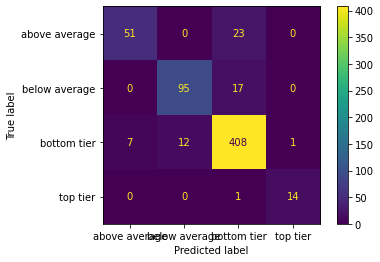

In [31]:
# create a confusion matrix
actual_test=y_test.copy()
ConfusionMatrixDisplay(confusion_matrix(actual_test,pred_test),display_labels=knn.classes_).plot()
plt.show()

In [35]:
# predict the dataset with our random forest model
prob_test = knn.predict_proba(X_test)

In [36]:
# create a probability dataframe
prob_df = pd.DataFrame(prob_test, columns=knn.classes_.tolist())
prob_df.head()

,above average,below average,bottom tier,top tier
0,0.466667,0.066667,0.2,0.266667
1,0.466667,0.066667,0.2,0.266667
2,0.466667,0.066667,0.2,0.266667
3,0.466667,0.066667,0.2,0.266667
4,0.466667,0.066667,0.2,0.266667


In [37]:
# reset the indext
reset_test =test.reset_index()
reset_test.head()

,index,full_state,state,county,population,revenue_per_person,state_funding,funding,buildvalue,agrivalue,...,hurricane_freq,hurricane_score,hurricane_loss,storm_freq,storm_score,storm_loss,pop_density,cost,support_value,support_level
0,882,Iowa,IA,Webster,38013,5434,206562642,27234213711,4.557015e+09,320681000.0,...,0.010000,5.987094,1.364573e+05,64.000000,15.357671,426158.438541,53.115018,3.450938e+06,2.743733e+10,bottom tier
1,2719,Texas,TX,Roberts,929,4744,4407176,249333695423,1.156920e+08,18301000.0,...,0.010000,0.252699,9.770930e+01,52.444444,2.083808,42870.393340,1.005349,8.059224e+05,2.493373e+11,above average
2,853,Iowa,IA,Mills,15059,5434,81830606,27234213711,1.735625e+09,98771000.0,...,0.000000,0.000000,4.912192e+05,64.851852,7.403062,950682.944755,34.425551,1.505655e+06,2.731454e+10,bottom tier
3,220,California,CA,San Benito,55269,7001,386938269,390811907053,5.174219e+09,162905000.0,...,0.000000,0.000000,4.463035e+03,0.407407,3.334341,127307.446440,39.800521,1.317705e+05,3.911987e+11,top tier
4,2615,Texas,TX,Grimes,26604,4744,126209376,249333695423,2.154036e+09,47509000.0,...,0.078574,14.003409,2.071933e+06,73.148148,14.015244,383384.508855,33.784131,3.184615e+06,2.494567e+11,above average


In [38]:
# put two dataframe together
test_prob_df = pd.concat([reset_test, prob_df], axis=1)
test_prob_df.head()

,index,full_state,state,county,population,revenue_per_person,state_funding,funding,buildvalue,agrivalue,...,storm_score,storm_loss,pop_density,cost,support_value,support_level,above average,below average,bottom tier,top tier
0,882,Iowa,IA,Webster,38013,5434,206562642,27234213711,4.557015e+09,320681000.0,...,15.357671,426158.438541,53.115018,3.450938e+06,2.743733e+10,bottom tier,0.466667,0.066667,0.2,0.266667
1,2719,Texas,TX,Roberts,929,4744,4407176,249333695423,1.156920e+08,18301000.0,...,2.083808,42870.393340,1.005349,8.059224e+05,2.493373e+11,above average,0.466667,0.066667,0.2,0.266667
2,853,Iowa,IA,Mills,15059,5434,81830606,27234213711,1.735625e+09,98771000.0,...,7.403062,950682.944755,34.425551,1.505655e+06,2.731454e+10,bottom tier,0.466667,0.066667,0.2,0.266667
3,220,California,CA,San Benito,55269,7001,386938269,390811907053,5.174219e+09,162905000.0,...,3.334341,127307.446440,39.800521,1.317705e+05,3.911987e+11,top tier,0.466667,0.066667,0.2,0.266667
4,2615,Texas,TX,Grimes,26604,4744,126209376,249333695423,2.154036e+09,47509000.0,...,14.015244,383384.508855,33.784131,3.184615e+06,2.494567e+11,above average,0.466667,0.066667,0.2,0.266667


In [39]:
# use the propability result to create a column call predicted
test_prob_df['predicted'] = pred_test
test_prob_df.head()

,index,full_state,state,county,population,revenue_per_person,state_funding,funding,buildvalue,agrivalue,...,storm_loss,pop_density,cost,support_value,support_level,above average,below average,bottom tier,top tier,predicted
0,882,Iowa,IA,Webster,38013,5434,206562642,27234213711,4.557015e+09,320681000.0,...,426158.438541,53.115018,3.450938e+06,2.743733e+10,bottom tier,0.466667,0.066667,0.2,0.266667,bottom tier
1,2719,Texas,TX,Roberts,929,4744,4407176,249333695423,1.156920e+08,18301000.0,...,42870.393340,1.005349,8.059224e+05,2.493373e+11,above average,0.466667,0.066667,0.2,0.266667,bottom tier
2,853,Iowa,IA,Mills,15059,5434,81830606,27234213711,1.735625e+09,98771000.0,...,950682.944755,34.425551,1.505655e+06,2.731454e+10,bottom tier,0.466667,0.066667,0.2,0.266667,bottom tier
3,220,California,CA,San Benito,55269,7001,386938269,390811907053,5.174219e+09,162905000.0,...,127307.446440,39.800521,1.317705e+05,3.911987e+11,top tier,0.466667,0.066667,0.2,0.266667,top tier
4,2615,Texas,TX,Grimes,26604,4744,126209376,249333695423,2.154036e+09,47509000.0,...,383384.508855,33.784131,3.184615e+06,2.494567e+11,above average,0.466667,0.066667,0.2,0.266667,above average


In [77]:
# retrive columns of interest
# create the region based on the state's location
west = ['WA','OR','CA','ID','NV','MT','WY','UT','AZ','CO','NM']
midwest = ['ND','MN','WI','MI','SD','NE','KS','IA','MO','IL','IN','OH']
south = ['TX','OK','AR','LA','MS','TN','KY','AL','GA','FL','SC','NC','VA','WV','MD','DE','DC']
northeast = ['PA','NJ','NY','CT','MA','RI','VT','NH','ME']
west_dict = {i:"west" for i in west}
midwest_dict = {i:"midwest" for i in midwest}
south_dict = {i:"south" for i in south}
northeast_dict = {i:"northeast" for i in northeast}
d = {**west_dict, **midwest_dict, **south_dict, **northeast_dict}
test_prob_df['Region'] = test_prob_df['state'].map(d)
csv_df = test_prob_df[['support_level', 'Region','predicted']]

In [87]:
csv_df

,support_level,Region,predicted
0,bottom tier,midwest,bottom tier
1,above average,south,bottom tier
2,bottom tier,midwest,bottom tier
3,top tier,west,top tier
4,above average,south,above average
...,...,...,...
624,bottom tier,south,below average
625,bottom tier,midwest,bottom tier
626,below average,south,below average
627,bottom tier,midwest,bottom tier


# Recommendation, Conclusion, and Next Step

## Recommendation
- The New York and California have the highest support_level. A seperated studies are recommended
- Climate change should be our national top concern, and higher amount of funding should be allocated.
- The KNN is our best model in our training, so we used it in our test. The model achived 90% accuracy 

## Conclusion 
- The initial data indicated that the New York and California have highest risk in the United States and studies found to back the findings.
- The South region has most diversed cost versus pop_density
- The South region has, as the author Cindy Ermus wrote in her book,"The Gulf South, and the Gulf Coast in particular, is bound together by much more than geography or the shared experience of risk and vulnerability to wind, water, erosion, and biological exchanges,” she writes. “More fundamentally, the environment has helped define the region’s identity and largely determined its history, its social fabric, and its economy.” We can assumed, based on this graph that south region has significant high risk compare to other regions

## Next Step
- Expand the scope of the data
- Improvise the machine learning model
- Would do a seperate studies regarding New York and California